# Example 5.7

MH sampler for a mixture of Gaussians with a random walk proposal.

/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_21744/2682125801.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n] = x_s


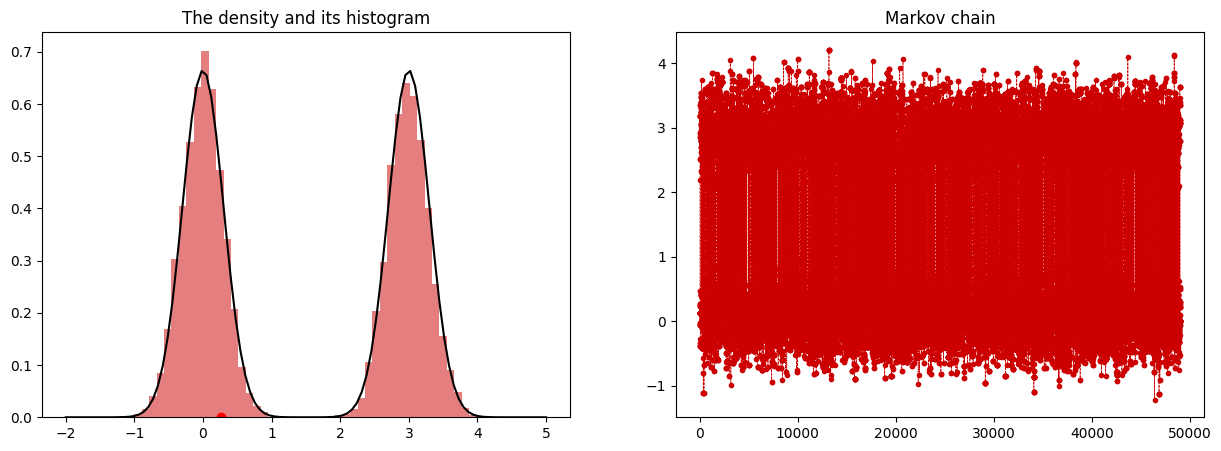

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

rng = np.random.default_rng(42)

def p_mix(x, mu1, mu2, sigma1, sigma2, w):
    return w * stats.norm.pdf(x, mu1, sigma1) + (1-w) * stats.norm.pdf(x, mu2, sigma2)

# there is no good way to compute log-mixture densities
# so we use the log-exp trick in general. But for this example, it is not necessary.
def log_p_mix(x, mu1, mu2, sigma1, sigma2, w):
    return np.log(w * stats.norm.pdf(x, mu1, sigma1) + (1-w) * stats.norm.pdf(x, mu2, sigma2))

def log_q(x_p, x, sigma):
    return -(x_p - x)**2/(2*sigma**2)


def log_r(x, x_p, mu1, sigma1, mu2, sigma2, w):
    return log_p_mix(x_p, mu1, mu2, sigma1, sigma2, w) - log_p_mix(x, mu1, mu2, sigma1, sigma2, w)

mu1 = 3
mu2 = 0
sigma1 = 0.3
sigma2 = 0.3
sigma_q = 2
w = 0.5

N = 50000

x = np.zeros(N)

x[0] = 1

burnin = 1000

fig = plt.figure(figsize=(15,5))

acc = 0

for n in range(1, N):

    x_s = rng.normal(x[n-1], sigma_q, 1)
    u = rng.uniform(0, 1, 1)

    if np.log(u) < log_r(x[n-1], x_s, mu1, sigma1, mu2, sigma2, w):
        x[n] = x_s
        acc += 1
    else:
        x[n] = x[n-1]

plt.clf()
plt.subplot(1,2,1)
plt.hist(x[burnin:], bins=50, density=True, color = [0.8, 0, 0], alpha = 0.5)
plt.plot(np.linspace(-2, 5, 100), p_mix(np.linspace(-2, 5, 100), mu1, mu2, sigma1, sigma2, 0.5), label='p', color = 'k')
plt.plot(x[n], 0, 'ro')
plt.title('The density and its histogram')
plt.subplot(1,2,2)
plt.plot(x[burnin:], '--.', color = [0.8, 0, 0], linewidth = 0.5)
plt.title('Markov chain')
plt.show()

Play with the above code changing burnin and initial points as well as proposal variance.